In [1]:
# Load required packages
library(survival)
library(survminer)
library(dplyr)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# install.packages('showtext')

In [10]:
library(showtext)
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



In [4]:
options(repr.plot.width = 14, repr.plot.height = 14)

# CD117 Survival Analysis

## 整理数据

In [18]:
# df_ac <- read.csv("ac.csv")
# df_tc <- read.csv("tc.csv")
df_sclc <- read.csv("sclc.csv")
df_lcnec <- read.csv("lcnec.csv")

In [19]:
# df_all <- bind_rows(df_ac, df_tc, df_lcnec, df_sclc)
df_all <- bind_rows(df_lcnec, df_sclc)

In [20]:
# 1 is null 2 is event
df_all$淋巴结转移 <- factor(df_all$淋巴结转移, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
# df_all$分型 <- factor(df_all$分型, 
#                      levels = c("AC", "TC", "SCLC", "LCNEC"), 
#                      labels = c("AC", "TC", "SCLC", "LCNEC"))
df_all$分型 <- factor(df_all$分型, 
                     levels = c("SCLC", "LCNEC"), 
                     labels = c("SCLC", "LCNEC"))
                     # labels = c(1, 2, 3, 4))
df_all$性别 <- factor(df_all$性别, 
                     levels = c("男", "女"), 
                     labels = c("男", "女"))
                     # labels = c(1, 0))
df_all$是否抽烟 <- factor(df_all$是否抽烟, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
df_all$pTNM分期 <- factor(df_all$pTNM分期, 
                     levels = c("I期", "II期", "III期"), 
                     labels = c("I期", "II期", "III期"))
                     # labels = c(1, 2, 3))
df_all$术前是否化疗 <- factor(df_all$术前是否化疗, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
df_all$CD117阳性 <- factor(df_all$CD117阳性, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
df_all$年龄 <- as.double(df_all$年龄)
df_all$生存.月. <- as.double(df_all$生存.月.)
                     # labels = c(1, 0))
# df_all$存活 <- factor(df_all$存活, 
#                      levels = c("是", "否"), 
#                      # labels = c("是", "否"))
#                      labels = c(0, 1))
df_all$存活 <- df_all$存活 == "否"

df_all

序号,分型,CD117阳性,性别,年龄,是否抽烟,肿瘤大小.直径cm.,淋巴结转移,pTNM分期,术前是否化疗,生存.月.,存活
<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
1,LCNEC,是,男,53,是,6.2,是,III期,否,4,TRUE
2,LCNEC,是,女,49,否,5.3,是,III期,否,7,TRUE
3,LCNEC,是,男,56,是,4.5,否,II期,否,7,TRUE
4,LCNEC,否,男,68,是,5.5,否,III期,是,10,TRUE
5,LCNEC,是,男,60,是,6.5,是,III期,否,19,FALSE
6,LCNEC,是,男,51,是,6.2,否,III期,否,26,TRUE
7,LCNEC,是,女,59,是,5.7,否,III期,否,36,FALSE
8,LCNEC,是,女,67,否,3.5,是,II期,否,40,TRUE
9,LCNEC,是,男,65,是,5.5,否,III期,否,44,FALSE


In [21]:
surv_object <- Surv(time = df_all$生存.月., event = df_all$存活)
surv_object

 [1]  4   7   7  10  19+ 26  36+ 40  44+ 47  50+ 54+ 55+ 56+ 58+ 59+ 61+ 65+ 67+
[20] 96+  3   6   6   8   9  11+ 13  15  15+ 20  21+ 23  27  31  33  37+ 38+ 41+
[39] 44  45+ 45+ 47+ 49+ 50+ 51+ 53+ 55+ 55+ 57  58+ 59+ 60+ 63+ 65+

## 1. 整体存活概率

Call: survfit(formula = surv_object ~ 1, data = df_all)

      n events median 0.95LCL 0.95UCL
[1,] 54     21     NA      47      NA

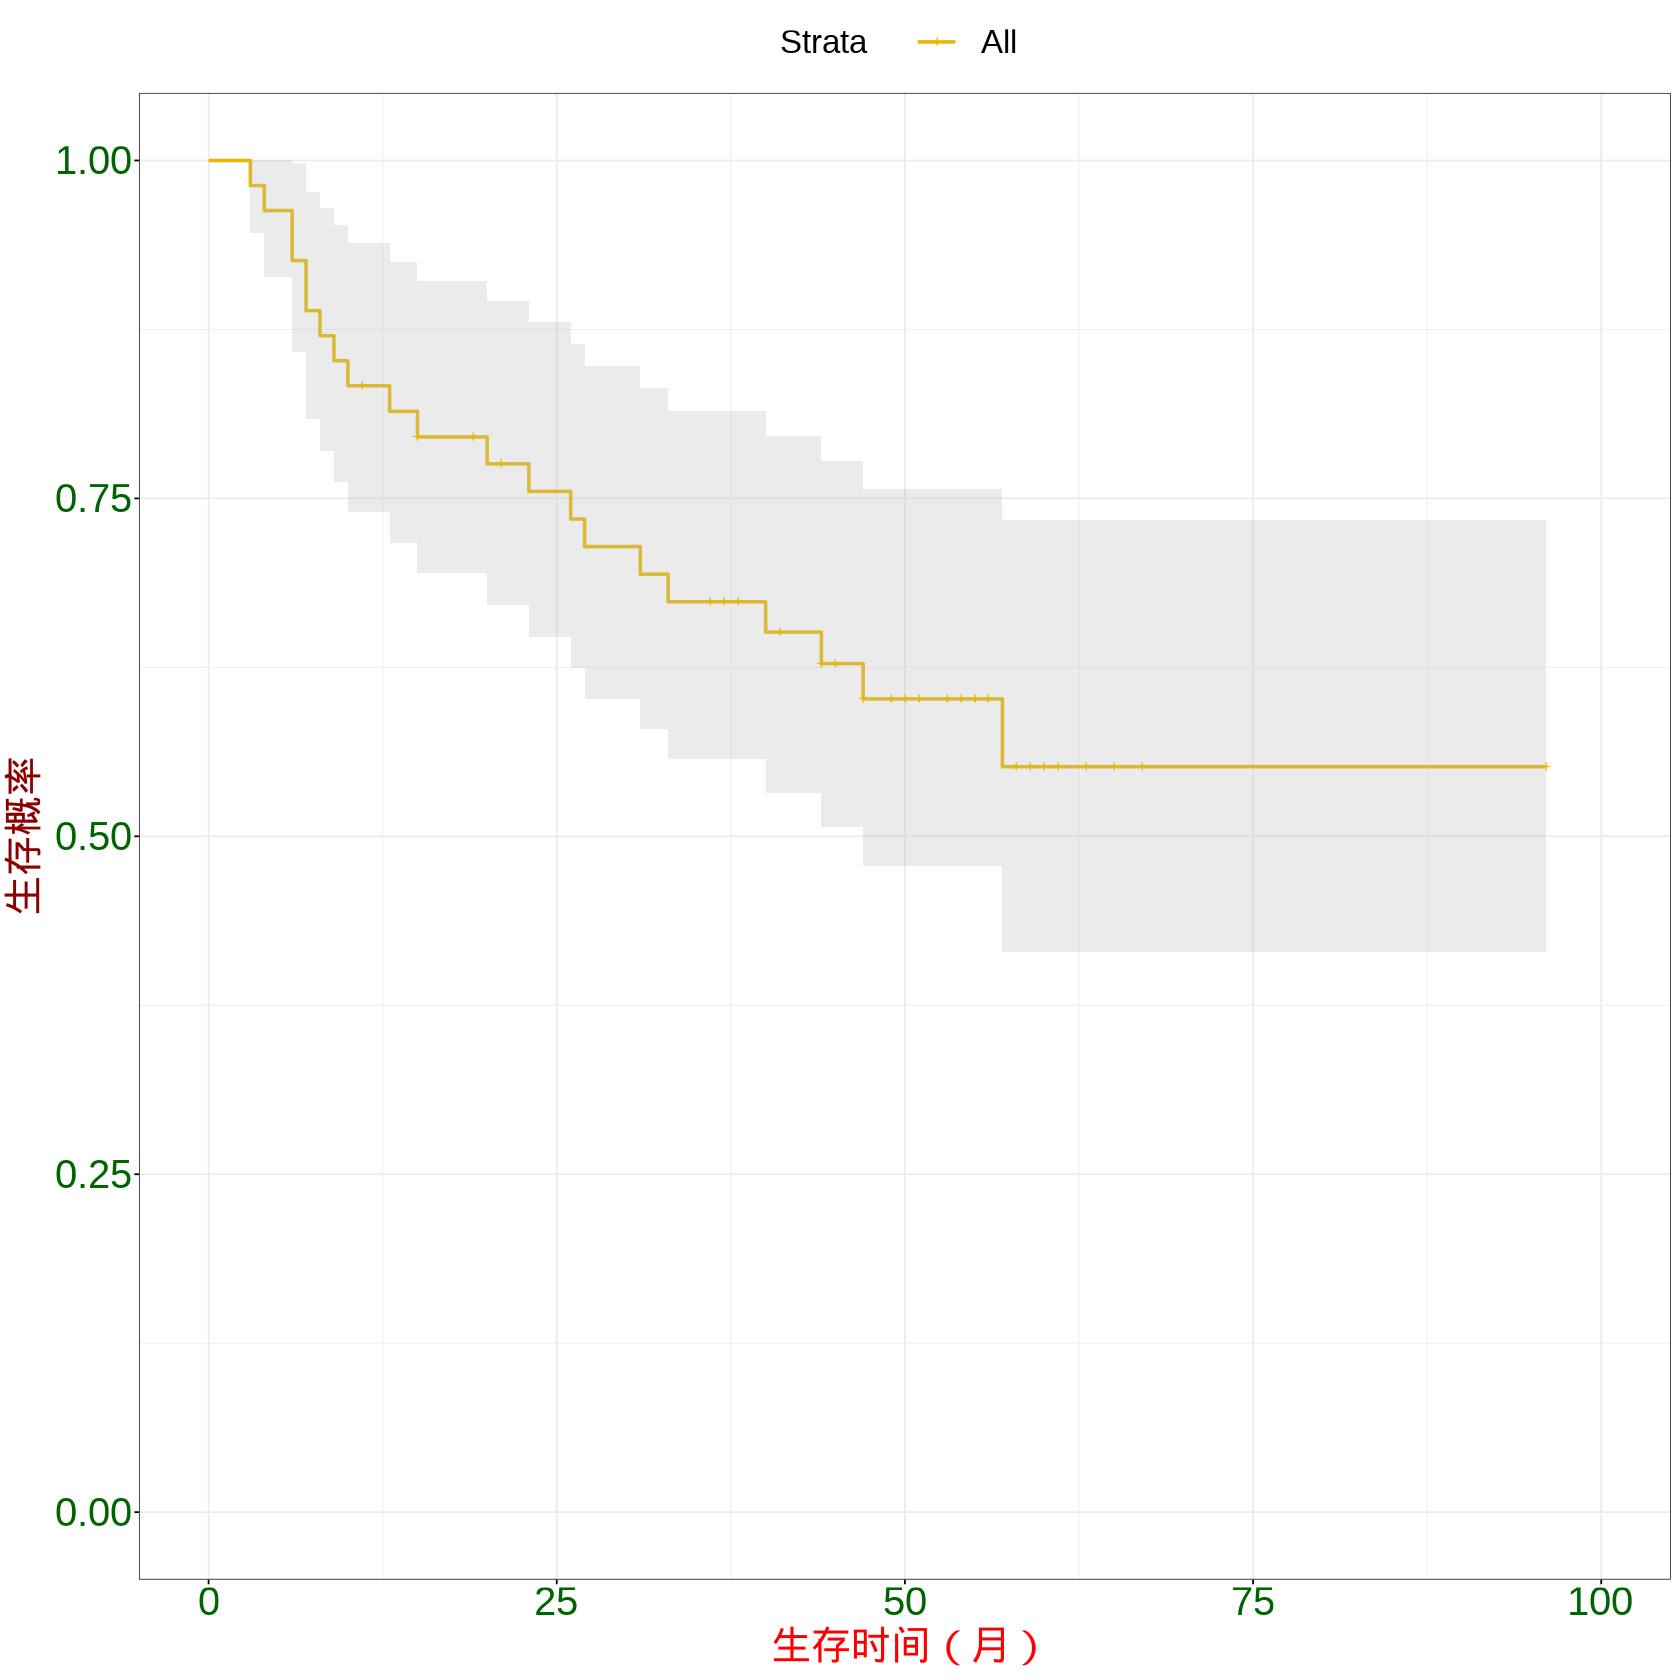

In [22]:
# Examine prdictive value of residual disease status
fit_overall <- survfit(surv_object ~ 1, data = df_all)
fit_overall
# plot(fit_overall, 
#      xlab = "生存时间（月）",
#      ylab = "生存概率")
# ggsurvplot(fit_overall, data = df_all)
plot_overall <- ggsurvplot(fit_overall,
           conf.int = TRUE,
           ggtheme = theme_bw(), # Change ggplot2 theme
           palette = c("#E7B800", "#2E9FDF"),
           xlab = "生存时间（月）", 
            ylab = "生存概率",
              font.x = c(30, "bold.italic", "red"),
   font.y = c(30, "bold.italic", "darkred"),
   font.tickslab = c(30, "plain", "darkgreen"))

# options(repr.plot.width = 14, repr.plot.height = 14)
plot_overall$plot <- plot_overall$plot + 
    # theme(legend.text = element_text(size = 14, color = "black", face = "bold"))
  theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=25), #change legend title font size
        legend.text = element_text(size=25)) #change legend text font size
plot_overall

## 2. 单因子（分型）KM模型

Call: survfit(formula = surv_object ~ 分型, data = df_all)

            n events median 0.95LCL 0.95UCL
分型=SCLC  34     14     57      33      NA
分型=LCNEC 20      7     NA      47      NA

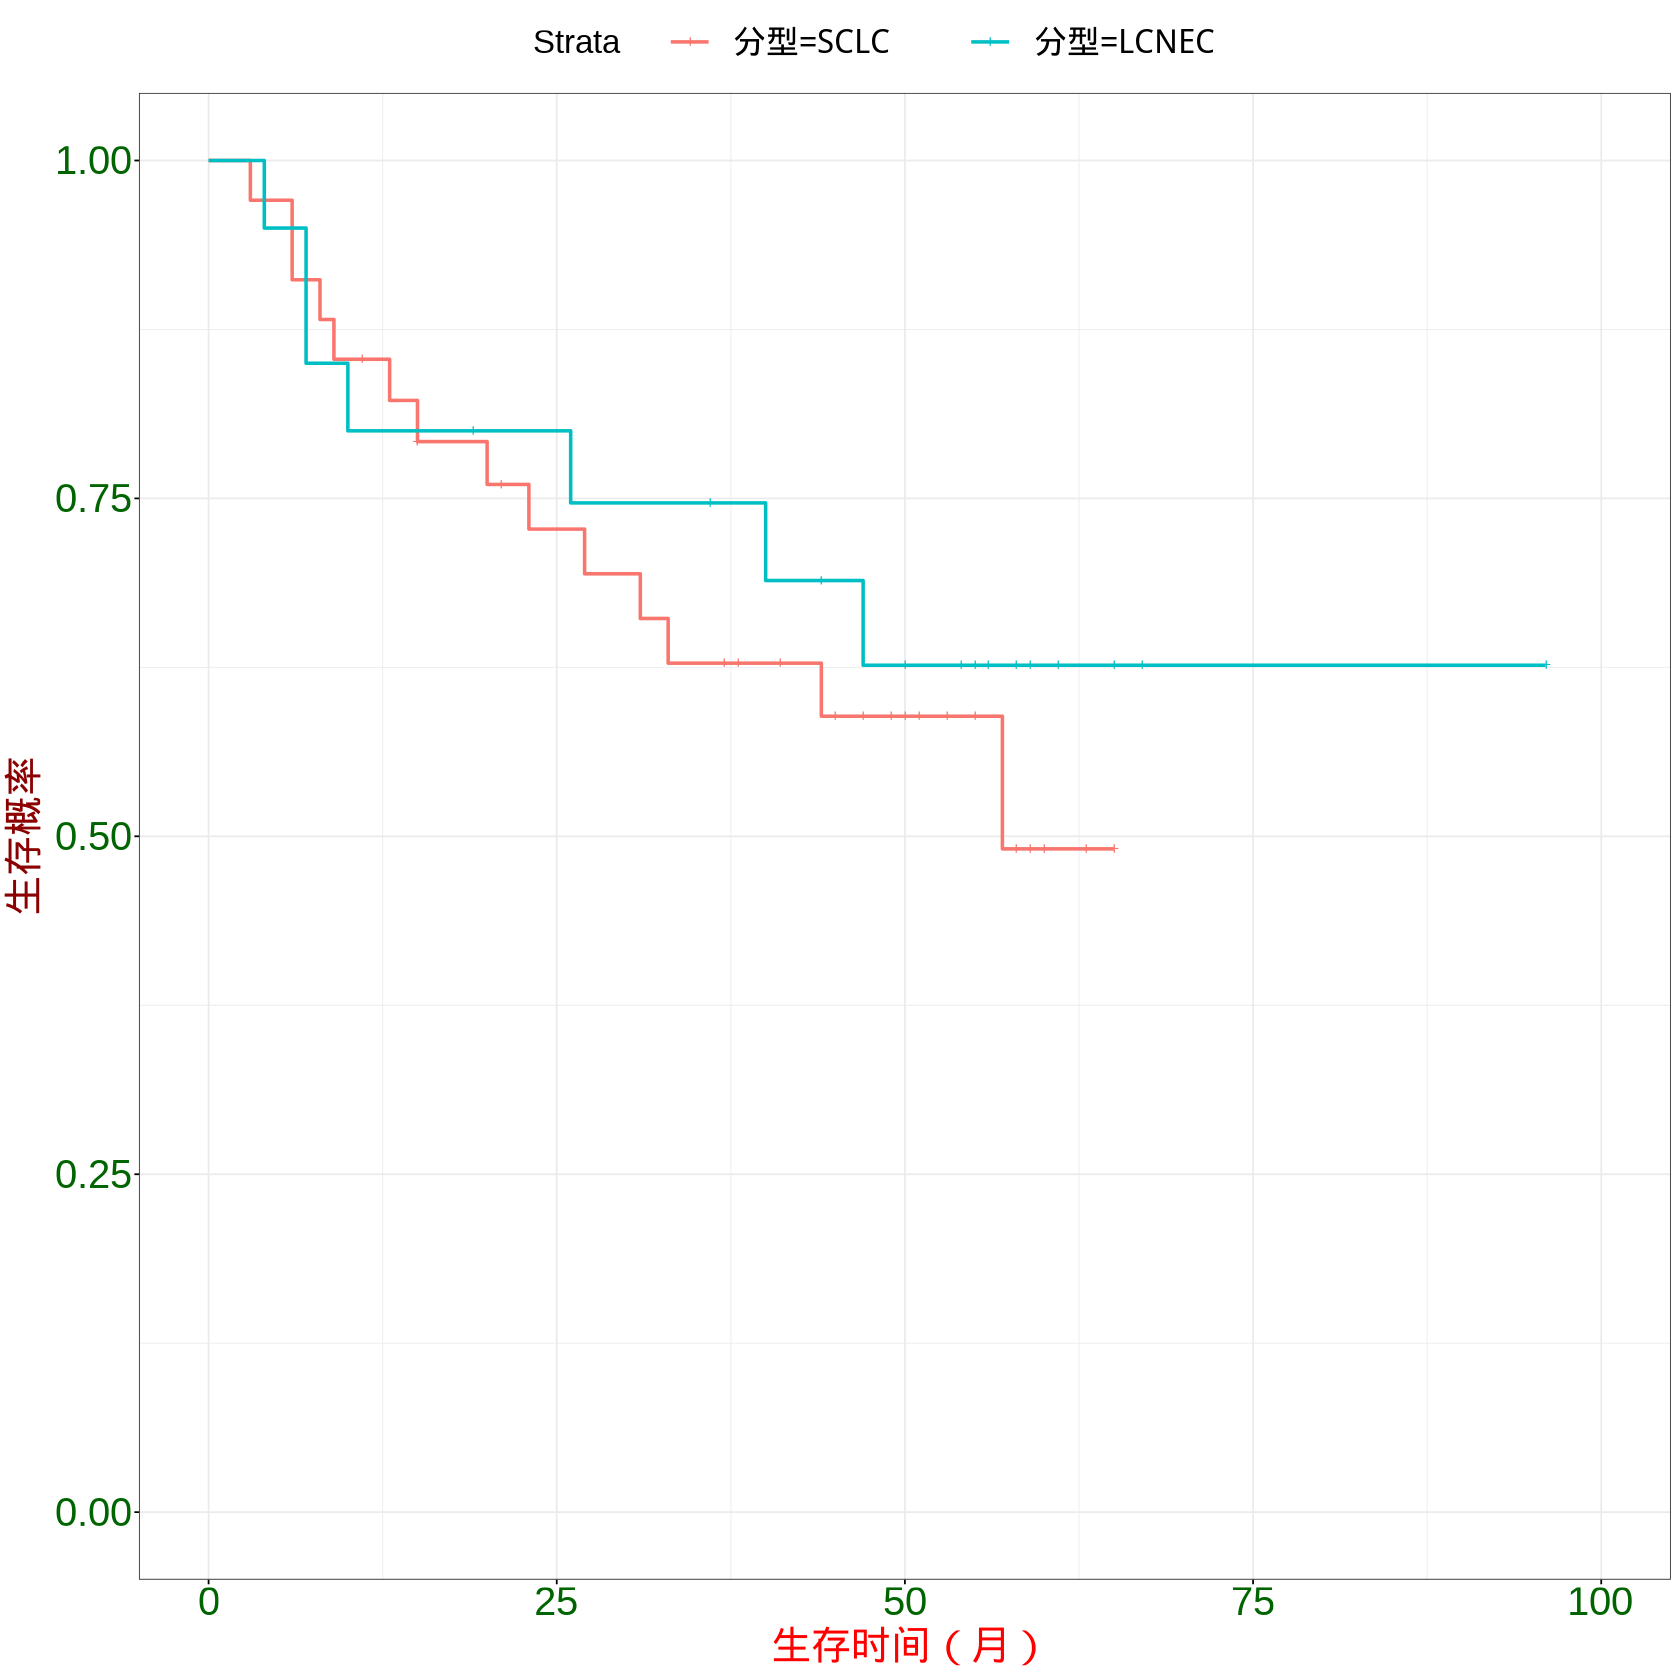

In [23]:
# Examine prdictive value of residual disease status
fit_type <- survfit(surv_object ~ 分型, data = df_all)
fit_type
plot_type <- ggsurvplot(fit_type,
           # conf.int = TRUE,
           ggtheme = theme_bw(), # Change ggplot2 theme
           # palette = c("#E7B800", "#2E9FDF"),
           xlab = "生存时间（月）", 
            ylab = "生存概率",
              font.x = c(30, "bold.italic", "red"),
   font.y = c(30, "bold.italic", "darkred"),
   font.tickslab = c(30, "plain", "darkgreen"))

# options(repr.plot.width = 14, repr.plot.height = 14)
plot_type$plot <- plot_type$plot + 
    # theme(legend.text = element_text(size = 14, color = "black", face = "bold"))
  theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=25), #change legend title font size
        legend.text = element_text(size=25)) #change legend text font size
plot_type

## 3. 单因子（CD117阳性）KM模型

Call: survfit(formula = surv_object ~ CD117阳性, data = df_all)

              n events median 0.95LCL 0.95UCL
CD117阳性=是 43     17     NA      40      NA
CD117阳性=否 11      4     NA      57      NA

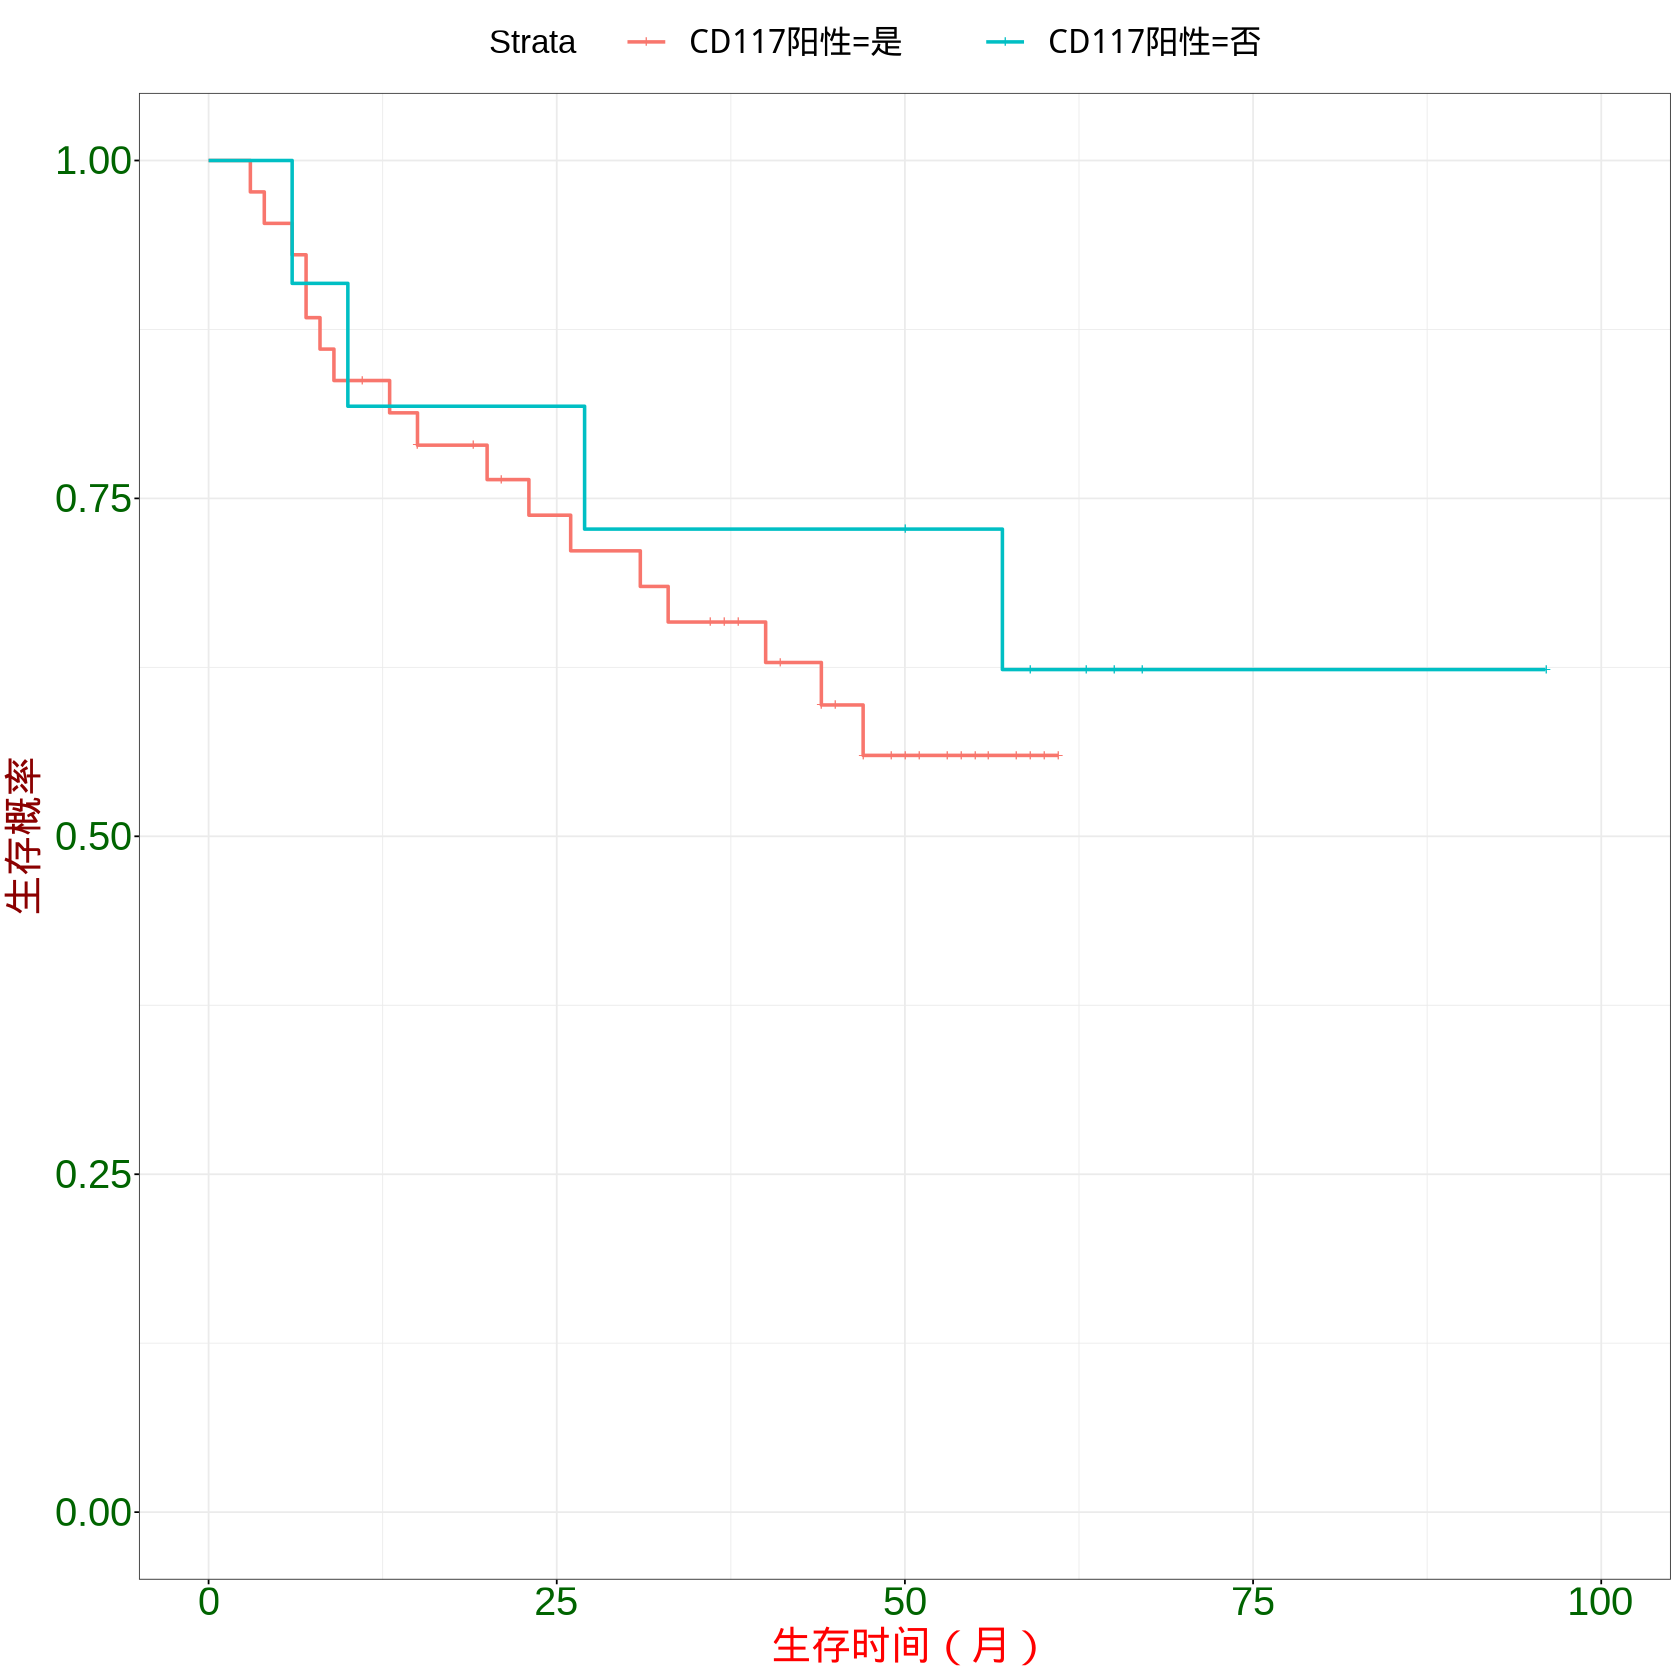

In [24]:
# Examine prdictive value of residual disease status
fit_cd117 <- survfit(surv_object ~ CD117阳性, data = df_all)
fit_cd117
plot_cd117 <- ggsurvplot(fit_cd117,
           # conf.int = TRUE,
           ggtheme = theme_bw(), # Change ggplot2 theme
           # palette = c("#E7B800", "#2E9FDF"),
           xlab = "生存时间（月）", 
            ylab = "生存概率",
              font.x = c(30, "bold.italic", "red"),
   font.y = c(30, "bold.italic", "darkred"),
   font.tickslab = c(30, "plain", "darkgreen"))

plot_cd117$plot <- plot_cd117$plot + 
    # theme(legend.text = element_text(size = 14, color = "black", face = "bold"))
  theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=25), #change legend title font size
        legend.text = element_text(size=25)) #change legend text font size
plot_cd117

## 4. Cox 多因子回归

### 生存比例

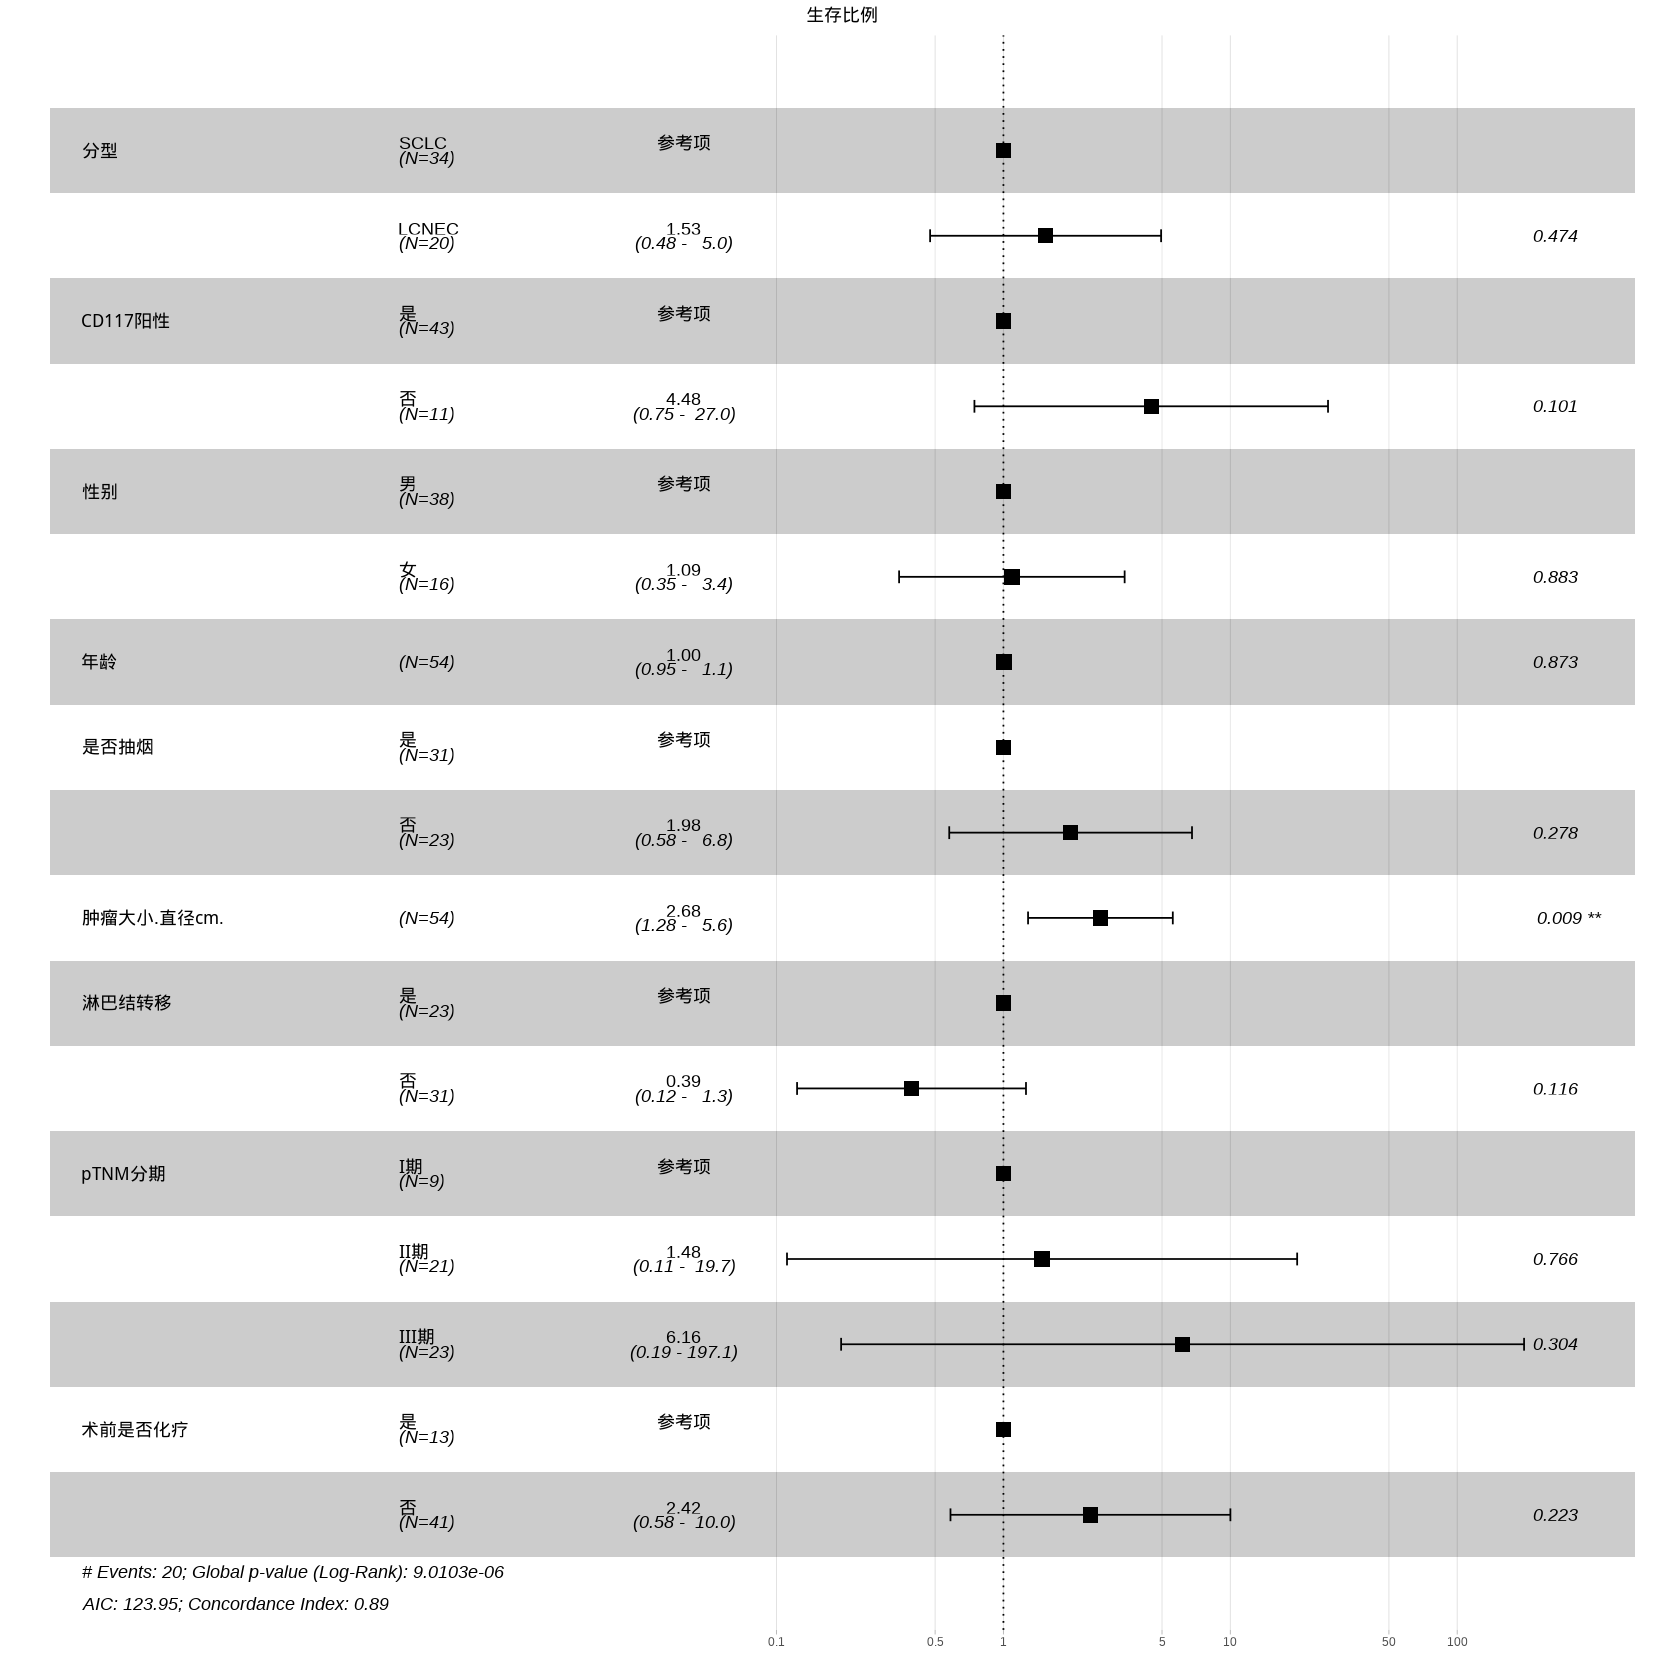

In [25]:
# Fit a Cox proportional hazards model
fit_coxph <- coxph(surv_object ~ 分型 + CD117阳性 + 性别 + 年龄 + 是否抽烟 + 肿瘤大小.直径cm. + 淋巴结转移 + pTNM分期 + 术前是否化疗,
                   data = df_all)
plot_forest <- ggforest(fit_coxph, data = df_all,
                        main = "生存比例",
                        # cpositions = c(0.02,0.22, 0.4),
                        fontsize = 1.2,
                        refLabel = "参考项")
plot_forest

In [26]:
summary(fit_coxph)

Call:
coxph(formula = surv_object ~ 分型 + CD117阳性 + 性别 + 
    年龄 + 是否抽烟 + 肿瘤大小.直径cm. + 淋巴结转移 + 
    pTNM分期 + 术前是否化疗, data = df_all)

  n= 53, number of events= 20 
   (1 observation deleted due to missingness)

                      coef exp(coef)  se(coef)      z Pr(>|z|)   
分型LCNEC         0.428121  1.534372  0.598001  0.716  0.47404   
CD117阳性否       1.500010  4.481736  0.915441  1.639  0.10130   
性别女            0.085773  1.089559  0.583904  0.147  0.88321   
年龄              0.004852  1.004863  0.030373  0.160  0.87309   
是否抽烟否        0.682030  1.977888  0.628507  1.085  0.27785   
肿瘤大小.直径cm.  0.984524  2.676538  0.374732  2.627  0.00861 **
淋巴结转移否     -0.932521  0.393560  0.592652 -1.573  0.11561   
pTNM分期II期      0.392366  1.480480  1.320770  0.297  0.76641   
pTNM分期III期     1.818368  6.161796  1.768117  1.028  0.30375   
术前是否化疗否    0.883100  2.418384  0.724660  1.219  0.22298   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 exp(coef) exp(-coef